In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Using the inspector to print the column names within the 'dow' table and its types
# Create the inspector and connect it to the engine
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x251f00e6c50>,
 'id': 0,
 'prcp': 2.0,
 'tobs': 18.3,
 'station': 'USC00519397',
 'date': '2010-01-01'}

In [24]:
# Find the most recent date in the data set.
rows=session.query(func.max(Measurement.date)).first()
for recent_date in rows:
   print(recent_date)

2017-08-23


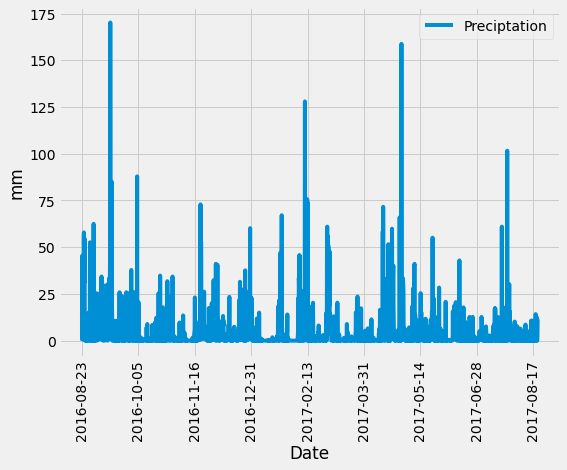

In [71]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recentdate=datetime.strptime(recent_date,"%Y-%m-%d")

# Calculate the date one year from the last date in data set.
year_ago = recentdate - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
prcp = session.query(*sel).filter(Measurement.date > year_ago).\
    filter(Measurement.date <= recentdate).all()
date_list=[]
prcp_list=[]
for record in prcp:
    (mea_date, mea_prcp) = record
    date_list.append(mea_date)
    prcp_list.append(mea_prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
data = {'Date':date_list, 'Preciptation':prcp_list}
df=pd.DataFrame(data)
df.set_index('Date',inplace=True)

# Sort the dataframe by date
df.sort_values('Date',inplace=True,ascending=True)
df.dropna(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(8,6),rot=90)
plt.ylabel("mm")
plt.xlabel("Date")
plt.show()

In [73]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Preciptation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [77]:
# Design a query to calculate the total number stations in the dataset
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [81]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x251fac0f310>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'id': 0,
 'elevation': 0.914}

In [80]:
rows=session.query(func.count(Station.station)).first()
for station_number in rows:
   print(f"Totle number of stations is {station_number}.")

Totle number of stations is 9.


In [99]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
from sqlalchemy import desc

sel = [Station.name, func.count(Measurement.station)]
rows=session.query(*sel).\
    filter(Station.station==Measurement.station).\
    group_by(Station.name).\
    order_by(desc(func.count(Measurement.station))).\
    all()

(st_name, most_active) = rows[0]
print(f"The most active station is {st_name}, the record counts is {most_active}.")


The most active station is WAIHEE 837.5, HI US, the record counts is 2772.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()